<a id="2"></a> <br>
### DATAI PyTorch tutorials - https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers
### Linear Regression with PyTorch
- Detailed linear regression tutorial is in my machine learning tutorial in part "Regression". I will not explain it in here detailed.
- Linear Regression tutorial: https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners
- y = Ax + B.
    - A = slope of curve
    - B = bias (point that intersect y-axis)
- For example, we have car company. If the car price is low, we sell more car. If the car price is high, we sell less car. This is the fact that we know and we have data set about this fact.
- The question is that what will be number of car sell if the car price is 10.

In [1]:
import numpy as np
import torch
from torch.autograd import Variable
import torch.nn as nn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

- **Steps of Linear Regression**
    1. create LinearRegression class
    1. define model from this LinearRegression class
    1. MSE: Mean squared error
    1. Optimization (SGD:stochastic gradient descent)
    1. Backpropagation
    1. Prediction

In [2]:
# create class
class LinearRegression(nn.Module):
    def __init__(self, input_size,output_size):
        # super function. It inherits from nn.Module and we can access everything in nn.Module
        super(LinearRegression, self).__init__()
        # Linear function.
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self,x):
        return self.linear(x)

- For example, we have car company. If the car price is low, we sell more car. If the car price is high, we sell less car. This is the fact that we know and we have data set about this fact.
- The question is that what will be number of car sell if the car price is 10.

In [3]:
# let say car prices are givin
car_price = [3,4,5,6,7,8,9]
car_price_np = np.array(car_price, dtype=np.float32)
car_price_np = car_price_np.reshape(-1, 1)

In [4]:
car_price_np

array([[3.],
       [4.],
       [5.],
       [6.],
       [7.],
       [8.],
       [9.]], dtype=float32)

In [5]:
# Tensor variable
car_price_tensor = Variable(torch.from_numpy(car_price_np))
car_price_tensor

tensor([[3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [6]:
# Collected data is like:
number_of_car_sell_array = [7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

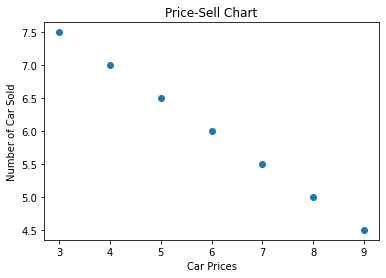

In [7]:
# Visualize
plt.scatter(car_price_tensor, number_of_car_sell_tensor)
plt.title("Price-Sell Chart")
plt.xlabel("Car Prices")
plt.ylabel("Number of Car Sold")
plt.show()

- Regression

In [8]:
# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim) # input and output size are 1

In [9]:
# MSE
mse = nn.MSELoss()

In [10]:
# Optimization (find parameters that minimize error)
learning_rate = 0.02   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

epoch 0, loss 9.101296424865723
epoch 50, loss 4.914002895355225
epoch 100, loss 3.320598602294922
epoch 150, loss 2.2438673973083496
epoch 200, loss 1.51627516746521
epoch 250, loss 1.0246113538742065
epoch 300, loss 0.6923729777336121
epoch 350, loss 0.4678652584552765
epoch 400, loss 0.3161560595035553
epoch 450, loss 0.21363987028598785
epoch 500, loss 0.1443655639886856
epoch 550, loss 0.09755369275808334
epoch 600, loss 0.06592109054327011
epoch 650, loss 0.04454583302140236
epoch 700, loss 0.03010174073278904
epoch 750, loss 0.020341133698821068
epoch 800, loss 0.013745345175266266
epoch 850, loss 0.009288134053349495
epoch 900, loss 0.006276394706219435
epoch 950, loss 0.0042411633767187595
epoch 1000, loss 0.002865961054340005


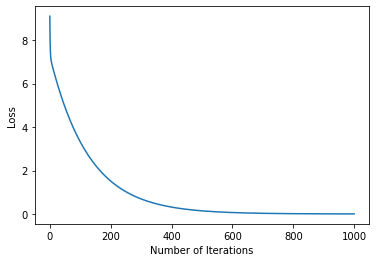

In [11]:
# train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(car_price_tensor)
    
    # Calculate Loss
    loss = mse(results, number_of_car_sell_tensor)
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

- Number of iteration is 1001.
- Loss is almost zero that you can see from plot or loss in epoch number 1000.
- Now we have a trained model.
- While usign trained model, lets predict car prices.

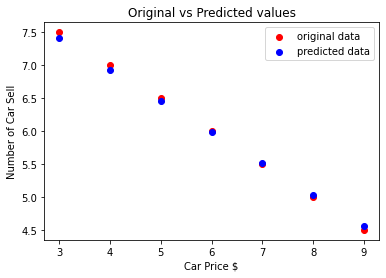

In [12]:
# predict our car price 
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_price, number_of_car_sell_array, label="original data", color="red")
plt.scatter(car_price, predicted, label="predicted data", color="blue")

# predict if car price is 10$, what will be the number of car sell
#predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()
#plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

In [13]:
price = [10]
price_np = np.array(price).reshape(-1, 1)
price_tensor = Variable(torch.from_numpy(price_np))
price_tensor

tensor([[10]])

In [14]:
# predict our car price 
predicted_10 = model(price_tensor.float()).data.numpy()

In [15]:
f"for {price[0]} dollars it is predicted {predicted_10[0][0]} cars will be sold!"

'for 10 dollars it is predicted 4.084932327270508 cars will be sold!'

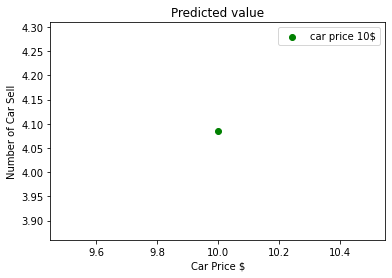

In [16]:
plt.scatter(price[0], predicted_10[0][0], label="car price 10$", color="green")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Predicted value")
plt.show()